In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import matplotlib.pyplot as plt
import select_features
#archivo = '..\data\ISBSG - Release May 2017 R1.csv'
archivo = '..\data\ISBSG DATA Release 12.csv'
df = pd.read_csv(archivo, sep = ';', low_memory = False)
#variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Data Quality Rating', 'UFP rating', 'Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Count Approach', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Summary Work Effort', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Resource Level', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
filtro = ((df['Data Quality Rating'] == 'A') | (df['Data Quality Rating'] == 'B')) & ((df['UFP rating'] == 'A') | (df['UFP rating'] == 'B')) 
df = df.loc[filtro, :]
filtro = (df['Normalised Work Effort Level 1'].notnull()) & (df['Normalised Work Effort Level 1'] == df['Summary Work Effort'])
df = df.loc[filtro, :]
filtro = df['Count Approach'] == 'IFPUG 4+'
df = df.loc[filtro, :]
#variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count', 'Agile Method Used']
variables = ['Industry Sector','Application Group', 'Development Type', 'Development Platform', 'Language Type', 'Primary Programming Language', 'Functional Size', 'Adjusted Function Points', 'Normalised Work Effort Level 1', 'Project Elapsed Time', 'Business Area Type', '1st Data Base System', 'Used Methodology', 'Max Team Size', 'Average Team Size', 'Input count', 'Output count', 'Enquiry count', 'File count', 'Interface count']
df = df.loc[:, variables]
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df = df.dropna()
print(len(df))
df['Project Elapsed Time'] = df['Project Elapsed Time'].str.replace(',', '.').astype(float)
programmingLenguaje = {'A:G':'Unspecified', 'ASP.Net':'ASP', 'BASIC':'Visual Basic', 'CSP':'Unspecified', 'Visual C':'C'}
df['Primary Programming Language'].replace( programmingLenguaje, inplace = True)
database = {'[;].*':';','ACCESS[; ].*':'ACCESS', 'MS Access':'ACCESS', 'ACCESS;':'ACCESS', 'ADABAS;':'ADABAS', 'Micosoft.*':'Attain', 'DB2[; /].*':'DB2', 'IBM DB2':'DB2', 'UDB2':'DB2', 'Domino[ ].*':'Domino', 'LOTUS.*':'Domino', 'Notes.*':'Domino', 'Exchange.*':'Exchange', 'FOXPRO;':'Foxpro', 'HIRDB;':'HIRDB', 'DB[/].*':'IMS', 'DEDB;':'IMS', 'IDMS[; -].*':'IMS', 'IMS.*':'IMS', 'MS[- ]SQL[; ].*':'MS SQL', 'MSDE.*':'MS SQL', 'SQL Server[; ].*':'MS SQL', 'SQL;':'MS SQL', 'VSE/.*':'MS SQL', 'NCR;':'NCR', 'Oracle.*':'ORACLE', 'Personal O.*':'ORACLE', 'RDB[; ].*':'ORACLE', 'CICS;':'ORACLE', 'SAS;':'SAS', 'Solid;':'Solid', 'SYBASE.*':'SYBASE', 'YES':'Unspecified', 'ISAM;':'Unspecified', 'multiple;':'Unspecified', 'VSAM[; ].*':'Unspecified', 'WATCOM[; ].*':'Watcom', 'WGRES;':'WGRES'}
df['1st Data Base System'].replace( database, inplace = True, regex = True)
df['1st Data Base System'].replace( {'ACCESS;':'ACCESS'}, inplace = True, regex = True)
#df = select_features.recodeDataframe(df)

621


In [3]:
test = select_features.calcularMi_Manual('Adjusted Function Points', df)
print(test)
testing = select_features.calc_MI_scikit(df['Adjusted Function Points'], df['1st Data Base System'])

Functional Size                   0.973149
Normalised Work Effort Level 1    0.956524
Project Elapsed Time              0.668329
Primary Programming Language      0.521037
Industry Sector                   0.445713
1st Data Base System              0.401316
Development Platform              0.265742
Used Methodology                  0.179815
Development Type                  0.167033
Language Type                     0.152879
Application Group                 0.069054
dtype: float64


{'Functional Size': -0.018008364747750805, 'Project Elapsed Time': 0.039236305554417705, 'Primary Programming Language': 0.04840226211638898, 'Industry Sector': 0.04080720093437484, '1st Data Base System': 0.04658669254138076, 'Development Platform': 0.048585087391565474, 'Used Methodology': 0.039906950121022716, 'Development Type': 0.035357338333955685, 'Language Type': 0.019341766823696205, 'Application Group': 0.004016579109324944}
{'Functional Size': 0.336261167587367, 'Project Elapsed Time': 0.31789671821960747, 'Primary Programming Language': 0.17644665949159982, 'Industry Sector': 0.20153932976885963, '1st Data Base System': 0.12864647683959074, 'Used Methodology': 0.11212428365236535, 'Development Type': 0.11583707867656255, 'Language Type': 0.06433468020966775, 'Application Group': 0.025747003465671423}
{'Project Elapsed Time': 0.2262314004886824, 'Primary Programming Language': 0.13353264492128342, 'Industry Sector': 0.15005506744341668, '1st Data Base System': 0.101579357555

Adjusted Function Points        0.956524
Development Platform            0.048585
Functional Size                 0.336261
Project Elapsed Time            0.226231
Primary Programming Language    0.167655
Industry Sector                 0.173160
1st Data Base System            0.135346
Development Type                0.117353
Used Methodology                0.099668
Language Type                   0.069469
Application Group               0.030958
dtype: float64

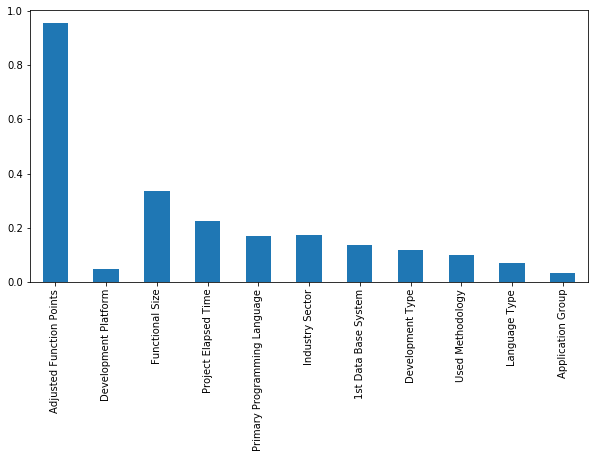

In [2]:
mRMR = select_features.calcular_mRMRV2('Normalised Work Effort Level 1', df)
#mRMR.sort_values(ascending=False).plot.bar(figsize=(10, 5))
mRMR.plot.bar(figsize=(10, 5))
mRMR

Adjusted Function Points        0.956524
Functional Size                 0.955140
Project Elapsed Time            0.707565
Primary Programming Language    0.569439
Industry Sector                 0.486520
1st Data Base System            0.447903
Development Platform            0.314327
Used Methodology                0.219722
Development Type                0.202390
Language Type                   0.172220
Application Group               0.073070
dtype: float64


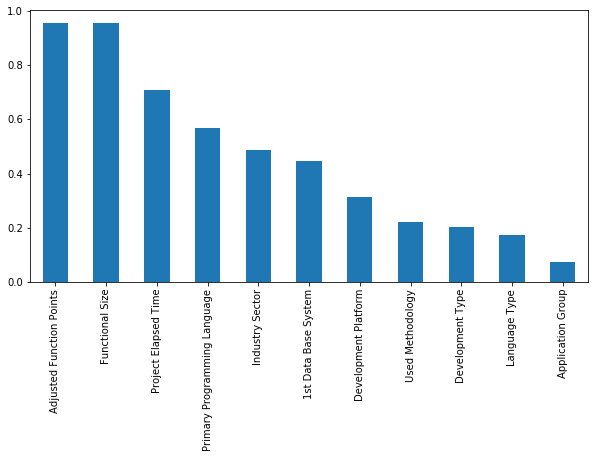

In [3]:
#Utilizando el método normalize_mutual_info_score
mi = select_features.calcularMi_Manual('Normalised Work Effort Level 1', df)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
print(mi)

In [ ]:
df.dtypes

In [ ]:
#variables = ['Industry Sector', 'Application Group', 'Development Type', 'Platform Development', 'Language Type', 'Primary Programming Language', '1st Data Base System', 'Used Methodology']
variables = ['1st Data Base System']
dcount = df.loc[:, variables]
for c in dcount.columns:
    print("---- %s ---" % c)
    print(dcount[c].value_counts())
    print('')